In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from statsmodels.tsa.api import SimpleExpSmoothing 
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df.rename(columns={'Month':'YearMonth'}, inplace=True)
df.head()


,YearMonth,Monthly beer production
Month,,
1956-01-01,1956-01,93.2
1956-02-01,1956-02,96.0
1956-03-01,1956-03,95.2
1956-04-01,1956-04,77.1
1956-05-01,1956-05,70.9


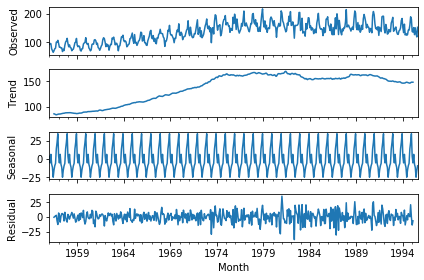

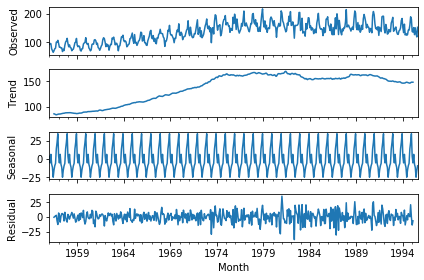

In [2]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df["Monthly beer production"]).plot()
# valitaan tämän perusteella malliksi Exponential Smoothing, koska aineistossa  kausivaihtelua
#trendissä muutos 70-l. puolessavälissä

In [3]:

malli = ExponentialSmoothing(df["Monthly beer production"], seasonal_periods=12, trend=None, seasonal="mul").fit() 
#trend=None antaa hieman parempia tuloksia kuin "add"

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


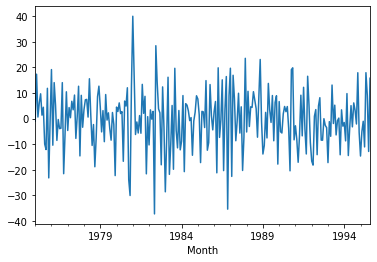

In [26]:
df["Resid"] = malli.resid 
df["Resid"].plot()

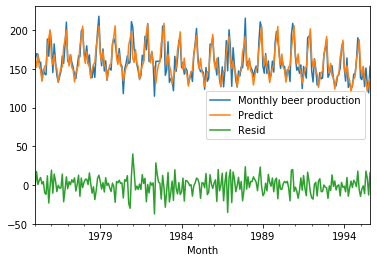

In [27]:
df["Predict"] = malli.fittedvalues 
df.plot()


In [5]:
sqrt(mean_squared_error(df["Monthly beer production"], df["Predict"]))

9.80046812318753

In [6]:
mean_absolute_error(df["Monthly beer production"], df["Predict"])

7.451668845891488

In [7]:
df1975 = df
indexNames = df1975[(df1975['YearMonth'] <= "1974-12")].index
 
df1975.drop(indexNames , inplace=True)

# kokeillaan, miltä tilanne näyttää, kun aikaväliä muutetaan


In [8]:
df1975.head()


,YearMonth,Monthly beer production,Predict
Month,,,
1975-01-01,1975-01,161.4,162.417850
1975-02-01,1975-02,169.4,152.035565
1975-03-01,1975-03,168.8,168.192588
1975-04-01,1975-04,158.1,151.961752
1975-05-01,1975-05,158.5,148.807020


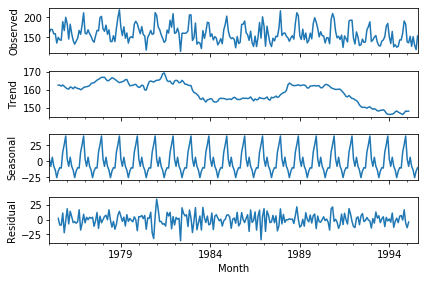

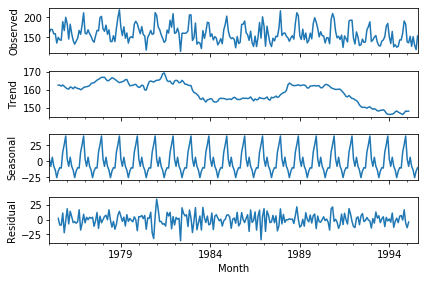

In [9]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df["Monthly beer production"]).plot()

In [12]:
malli1975 = ExponentialSmoothing(df1975["Monthly beer production"], seasonal_periods=12, trend="add", seasonal="mul").fit() 

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


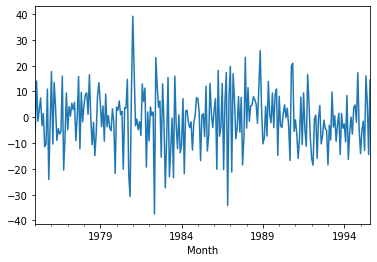

In [29]:
df1975["Resid"] = malli1975.resid 
df1975["Resid"].plot()


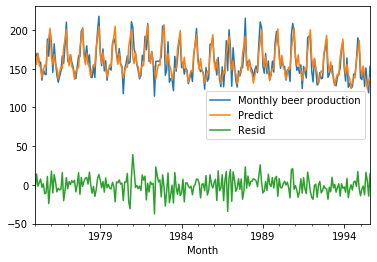

In [30]:

df1975["Predict"] = malli1975.fittedvalues 
df1975.plot()


In [14]:
df.tail()

,YearMonth,Monthly beer production,Predict
Month,,,
1995-04-01,1995-04,127.0,139.828617
1995-05-01,1995-05,151.0,134.939481
1995-06-01,1995-06,130.0,124.379325
1995-07-01,1995-07,119.0,133.396860
1995-08-01,1995-08,153.0,138.500931


In [ ]:
sqrt(mean_squared_error(df1975["Monthly beer production"], df1975["Predict"]))

In [ ]:
mean_absolute_error(df1975["Monthly beer production"], df1975["Predict"])

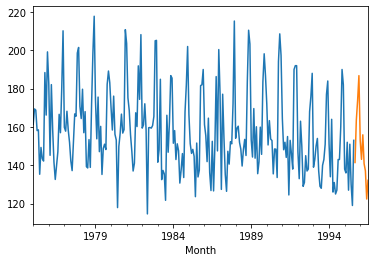

In [16]:
index = pd.date_range("1995-08-01", periods = 12, freq="MS")

datap = pd.DataFrame(malli.forecast(12), index=index) 
datap.columns =["Predict"]

df["Monthly beer production"].plot()
datap["Predict"].plot()

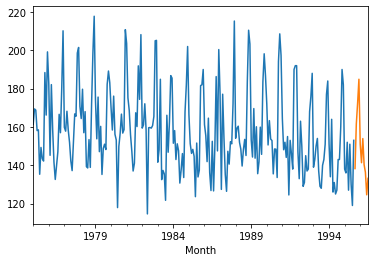

In [15]:
index = pd.date_range("1995-08-01", periods = 12, freq="MS")

datap = pd.DataFrame(malli1975.forecast(12), index=index) #https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-1/
datap.columns =["Predict"]

df1975["Monthly beer production"].plot()
datap["Predict"].plot()